In [2]:
#realizando todos os imports
import cv2
import dlib
import matplotlib.pyplot as plt

In [3]:
from google.colab.patches import cv2_imshow

In [4]:
#Importando o modelo pré-treinado do classificador Haarcascade
detector_facial = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [5]:
# Carregando as imagens
imagem1 = cv2.imread("Hereditario.jpg")
imagem2 = cv2.imread("PoderosoChefao.webp")
imagem3 = cv2.imread("taxiDriver.jpg")


In [6]:
gray1 = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(imagem3, cv2.COLOR_BGR2GRAY)

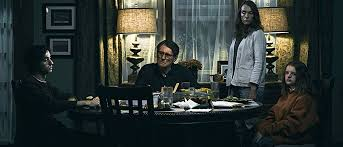

In [7]:
cv2_imshow(imagem1)

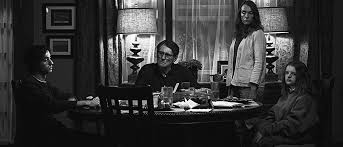

In [8]:
cv2_imshow(gray1)

In [9]:
# Executando a função de detecção de faces
deteccoes = detector_facial.detectMultiScale(imagem1, scaleFactor=1.09, minNeighbors=3, minSize=(55,55), maxSize=(74,74))

In [10]:
deteccoes, len(deteccoes)

(array([[103,  10,  63,  63]], dtype=int32), 1)

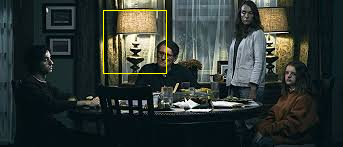

In [11]:
for x, y, w, h in deteccoes:
  cv2.rectangle(imagem1, (x, y), (x + w, y + h), (0,255,255), 1)
cv2_imshow(imagem1)

63 63


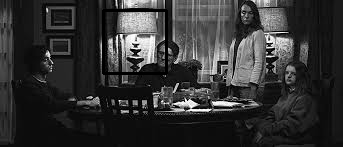

In [12]:

for (x, y, w, h) in deteccoes:
  print(w, h)
  cv2.rectangle(gray1, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(gray1)

HOG


In [13]:
detector_face_hog = dlib.get_frontal_face_detector()

In [14]:
deteccoes = detector_face_hog(imagem2, 2) 

In [15]:
deteccoes

rectangles[[(312, 81) (349, 118)], [(231, 117) (276, 162)], [(191, 107) (236, 152)]]

In [16]:
len(deteccoes)

3

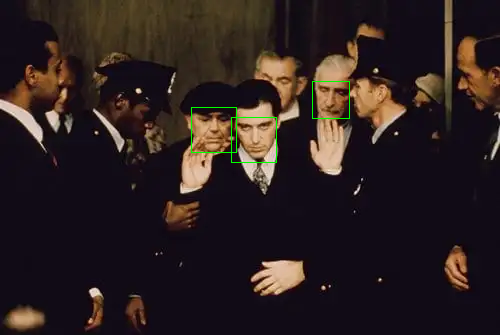

In [17]:
for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem2, (l, t), (r, b), (0, 255, 0), 1)
cv2_imshow(imagem2)

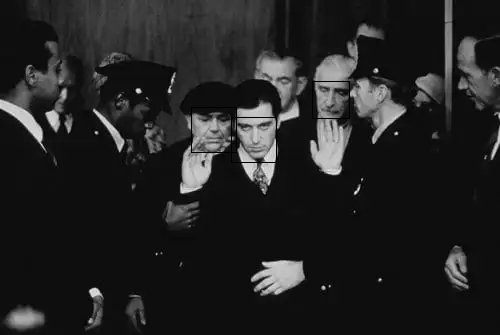

In [18]:
for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(gray2, (l, t), (r, b), (0, 255, 0), 1)
cv2_imshow(gray2)

CNN

In [19]:
detector_face_cnn = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')

224 223 292 291 1.048620581626892
458 231 576 349 1.030218243598938


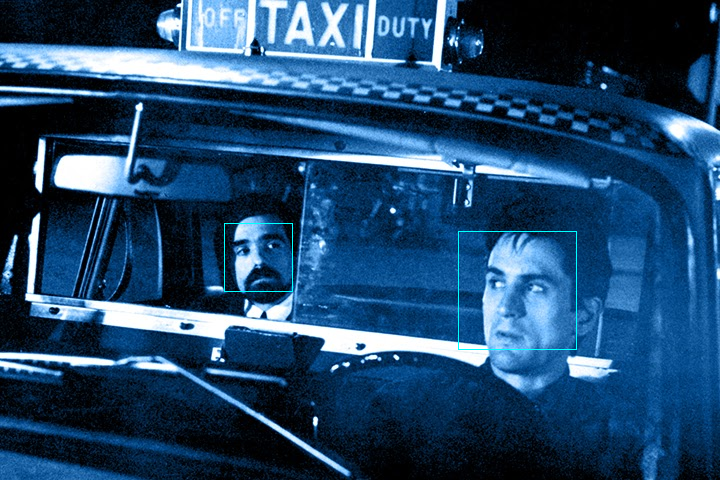

In [20]:
deteccoes = detector_face_cnn(imagem3, 1)
for face in deteccoes:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(l,t,r,b,c)
  cv2.rectangle(imagem3,(l,t), (r,b), (255, 255, 0), 1)
cv2_imshow(imagem3)

224 223 292 291 1.0751501321792603
462 260 560 358 1.0633809566497803


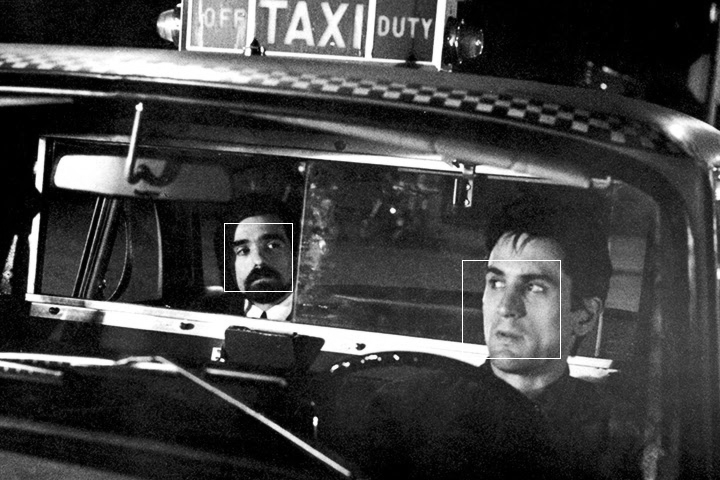

In [21]:
deteccoes = detector_face_cnn(gray3, 1)
for face in deteccoes:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(l,t,r,b,c)
  cv2.rectangle(gray3,(l,t), (r,b), (255, 255, 0), 1)
cv2_imshow(gray3)